# Estimation of survival functions

## Introduction

We now simulate 1000 women with and without treatment and estimate the survival functions with the Kaplan-Meier estimate to estimate whether the treatment has had an effect. 

The survival functions are  defined as the proportion of women alive at time t:
$$ S(t) = P(T > t) $$

and the Kaplan-Meier estimator is an unbiased estimator $S\hat(T)$ of the survival function:
$$ S\hat(T) = \frac{N-d(T)}{N} $$

where N is the total number of women and d(t) is the number of women how have died at time t. 

First, we simulate 1000 women who have not received the treatment and for each iteration we count how many women have died by that time step. The development of deaths is seen in the plot below. 

In [2]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
Q = np.array([[-0.0085, 0.005, 0.0025, 0, 0.001],
              [0, -0.014, 0.005, 0.004, 0.005], 
              [0, 0, -0.008, 0.003, 0.005],
              [0, 0, 0, -0.009, 0.009],
              [0, 0, 0, 0, 0]])

max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)
time_until_next_state = np.random.exponential(scale = 1/-Q[0][0], size = n_women)

# Array for number of deads pr time step. Starts with 0 because none are dead when we start the iterations.
n_deads = np.array([0])
# Array for time of update of dying event
time_at_event = np.array([0])
####


while np.min(women_states) < max_state:
# Get all individuals with state less than five (alive)
    women_alive_index = np.where(women_states < 5)[0]

    # Decide next event

    # Get minimum time until next state, only based on individuals alive
    time_min = np.min(time_until_next_state[women_alive_index])
    time_min_index = np.where((time_until_next_state == time_min))[0]
    time_until_next_state[women_alive_index] = time_until_next_state[women_alive_index] - time_min

    # Update states
    for elem in time_min_index:
        current_state = int(women_states[elem])
        probs = -Q[current_state-1,current_state:]/Q[current_state-1,current_state-1]
        new_state = np.random.choice(states[current_state:], p = probs)
        women_states[elem] = new_state
        
        # Update time only if state is not 5
        if new_state < 5: 
            time_until_next_state[elem] = np.random.exponential(scale = 1/-Q[new_state-1][new_state-1])

    # Update liftime
    lifetime[women_alive_index] += time_min
    
    # Save number of deads
    n_deads = np.concatenate((n_deads, np.array([len(women_states[women_states == 5])])))
    
    # Save time at event
    time_of_death = np.array([time_at_event[-1] + time_min])
    time_at_event = np.concatenate((time_at_event, time_of_death))

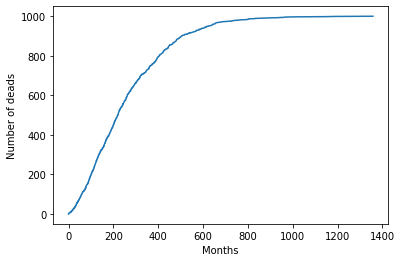

In [21]:
plt.plot(time_at_event, n_deads)
plt.xlabel('Months')
plt.ylabel('Number of deads')
plt.show()


To perform the same simulation for women in treatment, we first define the Q matrix for treatment. In the project description, Q is given without the diagonal values. The diagonal values are calculated as

$$ q_{ii} =−(q_{i1} +...+q_{i(i−1)} +q_{i(i+1)} +...q_{iN}) $$  for i = 1, ..., N.

This gives the following Q matrix for treatment:

In [30]:
# Q for treatment
Q_treatment = np.array([[0, 0.0025, 0.00125, 0, 0.001],
              [0, 0, 0, 0.002, 0.005], 
              [0, 0, 0, 0.003, 0.005],
              [0, 0, 0, 0, 0.009],
              [0, 0, 0, 0, 0]])

# Calculate diagonal values
for i in range(len(Q)):
    Q_treatment[i,i] = -(np.sum(Q_treatment[i,i+1:]))
    
print(Q_treatment)

[[-0.00475  0.0025   0.00125  0.       0.001  ]
 [ 0.      -0.007    0.       0.002    0.005  ]
 [ 0.       0.      -0.008    0.003    0.005  ]
 [ 0.       0.       0.      -0.009    0.009  ]
 [ 0.       0.       0.       0.      -0.     ]]


We can now run the same code as before and calculate development of deads and times for events (deads). A comparison between development of deads with and without treatment is seen in the plot below.  

In [36]:
max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)
time_until_next_state = np.random.exponential(scale = 1/-Q_treatment[0][0], size = n_women)

# Array for number of deads pr time step. Starts with 0 because none are dead when we start the iterations.
n_deads_treatment = np.array([0])
# Array for time of update of dying event
time_at_event_treatment = np.array([0])


while np.min(women_states) < max_state:
# Get all individuals with state less than five (alive)
    women_alive_index = np.where(women_states < 5)[0]

    # Decide next event

    # Get minimum time until next state, only based on individuals alive
    time_min = np.min(time_until_next_state[women_alive_index])
    time_min_index = np.where((time_until_next_state == time_min))[0]
    time_until_next_state[women_alive_index] = time_until_next_state[women_alive_index] - time_min

    # Update states
    for elem in time_min_index:
        current_state = int(women_states[elem])
        probs = -Q_treatment[current_state-1,current_state:]/Q_treatment[current_state-1,current_state-1]
        new_state = np.random.choice(states[current_state:], p = probs)
        women_states[elem] = new_state
        
        # Update time only if state is not 5
        if new_state < 5: 
            time_until_next_state[elem] = np.random.exponential(scale = 1/-Q_treatment[new_state-1][new_state-1])

    # Update liftime
    lifetime[women_alive_index] += time_min
    
    # Save number of deads
    n_deads_treatment = np.concatenate((n_deads_treatment, np.array([len(women_states[women_states == 5])])))
    
    # Save time at event
    time_of_death = np.array([time_at_event_treatment[-1] + time_min])
    time_at_event_treatment = np.concatenate((time_at_event_treatment, time_of_death))

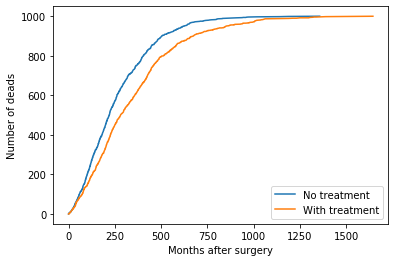

In [47]:
plt.plot(time_at_event, n_deads, label = 'No treatment')
plt.plot(time_at_event_treatment, n_deads_treatment, label = 'With treatment')
plt.xlabel('Months after surgery')
plt.ylabel('Number of deads')
plt.legend()
plt.show()

We now estimate the survival function $S\hat(t)$ for the group with and without treatment.

In [44]:
S_hat_no_treatment = (n_women - n_deads)/n_women
S_hat_treatment = (n_women - n_deads_treatment)/n_women

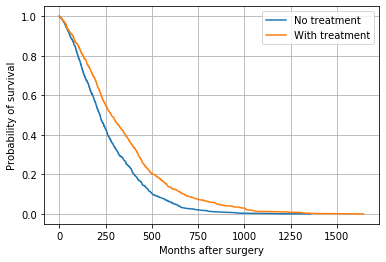

In [49]:
plt.plot(time_at_event, S_hat_no_treatment, label = 'No treatment')
plt.plot(time_at_event_treatment, S_hat_treatment, label = 'With treatment')
plt.xlabel('Months after surgery')
plt.ylabel('Probability of survival')
plt.grid()
plt.legend()
plt.show()

To compare the benefits of the treatment better, we can plot fewer months on the x-axis (1500 months corresponds to 125 years, and we do not assume that the patients will reach an age of at least 125 years, also because they most likely don't have cancer at birth). We therefore plot for 1000 months (corresponding to about 83 years, which is still a long time and most patients will die from old age before this). 

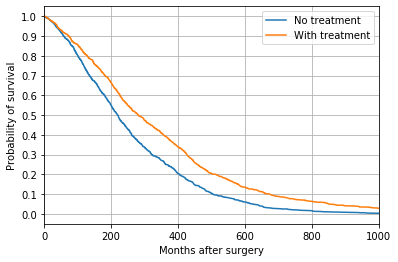

In [56]:
plt.plot(time_at_event, S_hat_no_treatment, label = 'No treatment')
plt.plot(time_at_event_treatment, S_hat_treatment, label = 'With treatment')
plt.xlim(0,1000)
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('Months after surgery')
plt.ylabel('Probability of survival')
plt.grid()
plt.legend()
plt.show()



We now see that while patients who have not been given the treatment have 50$\%$ chance of being alive after about 220 months (about 18 years), patients who have received treatment have a 50$\%$ chance of being alive after almost 300 months (almost 25 years). The increased survival rate for treatment is general for all months after surgery. The treatment therefore has a beneficial effect on survival. 